TU Delft internship of Bordeaux ENSEIRB -MATMECA student Anouchka Desmettre 
Dates: June 1st - August 31st, 2024 

Supervision: D. Lahaye (DIAM - EEMCS Faculty - TU Delft)

# Title: Mathematical modelling and numerical simulation of driving buses and vibrations door   

## 4 Two Point Mass System 

### 4.1 Case-study/Description/Motion: 

Consider a model with two interconnected point masses (2-DOF along x-axis). This can represent various scenarios such as a bus and door, two doors, a door separated into two parts, or a door separated into a glass and metal frame. The motion of the system can be described using the displacement of each mass along the x-axis.

### 4.2 Mathematical Model 

#### ODE for Two Mass-Spring-Damper System

Consider a system of two coupled point masses with the following equations of motion:

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) =  F_{external1}(t) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = F_{external2}(t) 
\end{cases}
$

where:

- $ m_1 $ and $ m_2 $ are the masses.
- $\gamma_1$: Damping coefficient associated with $u_1$, $\gamma_2$: Shared damping coefficient affecting both $u_1$ and $u_2$, $\gamma_3$: Damping coefficient associated with $u_2$.
- $k_1$: Spring constant related to $u_1$, $k_2$: Shared spring constant between $u_1$ and $u_2$, $k_3$: Spring constant related to $u_2$.
- $F_{\text{external1}}(t)$: External force acting on $u_1$, $F_{\text{external2}}(t)$: External force acting on $u_2$.

#### Initial Conditions

The system starts from rest, so the initial conditions are:

$
u_1(0) = 0 \quad \text{(zero initial position of mass 1)}
$

$
\dot{u}_1(0) = 0 \quad \text{(zero initial velocity of mass 1)}
$

$
u_2(0) = 0 \quad \text{(zero initial position of mass 2)}
$

$
\dot{u}_2(0) = 0 \quad \text{(zero initial velocity of mass 2)}
$

### 4.3 Parameter values

1. **Masses $m_1$ and $m_2$:**  
Between 50 and 100 kg for each mass.

2. **Spring Constants $k_1$ and $k_2$:** 
These are chosen such that $\sqrt{\frac{k_1}{m_1}}$ and $\sqrt{\frac{k_3}{m_2}}$ match the measured resonant frequencies $\omega_{01}$ and $\omega_{02}$, respectively:
   $ k_1 = m_1 \omega_{01}^2 $ and $ k_3 = m_2 \omega_{02}^2 $ (simple harmonic motion).

3. **Damping Coefficients $\gamma_1$, $\gamma_2$, $\gamma_3$:**
Estimation of these coefficients is challenging. Typically determined through experimental measurements or tuning based on observed system behavior.

### 4.4 Impact study 

**Modeling a Two-Mass System with Four Nodes and Three Springs without Damping**

#### Case Description

Consider a system with four nodes (two movable and two static) connected by three springs ($k_1$, $k_2$ and $k_3$). The first and last nodes are fixed, while the middle nodes contain the masses $m_1$ and $m_2$. 

<img src="2masses_3springs.png" alt="2masses_3springs">


#### Equations of Motion
An impulsive force $ F_0 \delta(t - t_0) $ is applied to one of the masses, either $ m_1 $ or $ m_2 $.

$
\begin{cases}
m_1 \ddot{u}_1 + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$

These equations describe the dynamic behavior of the two-mass system when an impulsive force $ F_0 \delta(t - t_0) $ is applied to the first mass at time $t_0$.

#### Analytical Solution without damping using Matrix 
1. **Definition of the Connectivity Matrix, the Diagonal Matrix of Spring Constants and the Diagonal Mass Matrix**

The connectivity matrix $ B $ describes the kinematics (geometry of interconnections) between the points and the springs : 
$ 
B = \begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
$

The diagonal matrix $D$ contains the values of the spring constants. This matrix is of size $ 3 \times 3 $ because there are three springs 
$ 
D = \begin{pmatrix} 
k_1 & 0 & 0 \\
0 & k_2 & 0 \\
0 & 0 & k_3
\end{pmatrix} 
$

The diagonal matrix $M$ contains the values of the masses. This matrix is of size $ 2 \times 2 $ because there are two masses 
$ 
M = \begin{pmatrix} 
m_1 & 0 \\
0 & m_2 \\
\end{pmatrix} 
$


2. **Calculation of the Weighted Laplacian Matrix**

The weighted Laplacian matrix $ K $ is obtained by multiplying $ B $, $ D $, and the transpose of $ B $ : $ K = B^\top D B $

We compute:
$ 
K = \begin{pmatrix} 
1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1 \\ 0 & 0 & -1 \\ 
\end{pmatrix}
\begin{pmatrix} 
k_1 & 0 & 0  \\
0 & k_2 & 0  \\
0 & 0 & k_3 
\end{pmatrix}
\begin{pmatrix} 
1 & -1 & 0 & 0 \\
0 & 1 & -1 & 0 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} 
\iff K = \begin{pmatrix} k_1 & -k_1 & 0 & 0 \\ -k_1 & k_1 + k_2 & -k_2 & 0 \\ 0 & -k_2 & k_2 + k_3 & -k_3 \\ 0 & 0 & -k_3 & k_3 \\\end{pmatrix} 
$

3. **Extraction of the Submatrix $ K_0 $**

The submatrix $ K_0 $ is obtained by removing the first and last rows and columns of $ K $, representing the fixed points.

$ K_0 = \begin{pmatrix}
k_1 + k_2 & -k_2 \\
-k_2 & k_2 + k_3
\end{pmatrix} $. Thus, $ K_0 $ only contains the elements corresponding to the mobile node

4. **Writing the System Equation with an Impulsive Force**:
   The equation of motion with an impulsive force $ F_0 \delta(t - t_0) $ applied to $ m_1 $ is given by:

$ 
M \ddot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t) 
$, where $ \vec{F}(t) $ is : $ 
\vec{F}(t) = \begin{pmatrix} 
F_0 \delta(t - t_0) \\
0 
\end{pmatrix}
$

5. **Solving the System Equation**

- Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : $z = \begin{pmatrix} u_1 \\ u_2 \\ \dot{u}_1 \\ \dot{u}_2 \end{pmatrix}$, the state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & 0 & 0 \\ \frac{k_2}{m_2} & -\frac{k_2 +k_3}{m_2} & 0 & 0 \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{ F_0 \delta(t - t_0)}{m_1} \\ 0 \end{pmatrix} \iff
\dot{z} = \begin{pmatrix} 0 & I \\ - M^{-1}K_0 & 0 \end{pmatrix} z + \begin{pmatrix} 0 \\ M^{-1}F \end{pmatrix} $

In order to simplify the system, we set $ k_1 = k_2 = k_3 = k$. 

- Compute Eigenvalues and Eigenvectors

Compute the eigenvalues and eigenvectors of matrix A.

- Construct Modal Coordinates

Construct the modal coordinates using the inverse of matrix : $ \mathbf{q} = \mathbf{V}^{-1} \mathbf{z} $, where $u$ is the vector of displacements and velocities.

- Transform the System into Modal Coordinates

Transform the system of differential equations into modal coordinates : $\mathbf{\dot{q}} = \mathbf{V}^{-1} \mathbf{A} \mathbf{V} \mathbf{q} + \mathbf{V}^{-1} \mathbf{F}$.

- Solve the System in Modal Coordinates

Solve the transformed system of equations in modal coordinates : $ \mathbf{\ddot{q}_i + \lambda_i \dot{q}_i = F_{modal,i} }$, where $ \lambda_i $ are the eigenvalues and $q_i$ are the modal coordinates and $F_{modal,i}$ the modal external force.

- Convert Back to Original Coordinates

Convert the solutions from modal coordinates back to the original coordinates : $ \mathbf{z}(t) = \mathbf{V} \mathbf{q}(t) $ to obtain the solutions in terms of displacements and velocities $u_i(t)$.

In [3]:
using SymPy

# Définir les symboles
@syms λ k m1 m2 γ t t0 F0 sigma


# Définir la matrice A symbolique
A = sympy.Matrix( 4, 4, 
    [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(2*k / m1), k / m1, 0, 0,
    k / m2, -2*k / m2, 0, 0
])

# Calculer les valeurs propres symboliques de A
λ = A.eigenvals()
V = A.eigenvects()

display(λ)
λ_values = collect(keys(λ))
V_matrix = []

# Parcourir chaque tuple (valeur propre, liste des vecteurs propres)
for item in V
    eigenvalue, _, eigenvectors_list = item
    for eigenvector_matrix in eigenvectors_list
        # Chaque 'eigenvector_matrix' contient un vecteur propre sous forme de matrice
        # On extrait le vecteur propre, qui est le seul élément de la liste
        push!(V_matrix, eigenvector_matrix)
    end
end

# Concaténer tous les vecteurs propres en colonnes pour former la matrice V
V_matrix = hcat(V_matrix...)

# Afficher la matrice des vecteurs propres
display(V_matrix)

Dict{Sym{PyCall.PyObject}, Sym{PyCall.PyObject}} with 4 entries:
  sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))  => 1
  -sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)) => 1
  -sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)) => 1
  sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))  => 1

4×4 Matrix{Sym{PyCall.PyObject}}:
 -(-4*m1 - m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) + 2*m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)  …  (-4*m1 - m2)*sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) - 2*m1*m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)
 -(-2*m1 - 2*m2)*sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) + m1*m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)     (-2*m1 - 2*m2)*sqrt(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/(3*k) - m1*m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))^(3/2)/(3*k^2)
                                                                                             2 + m2*(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/k                                                                                                2 + m2*(-k/m2 - k/m1 + k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))/k
                              

In [4]:
# Transformer A  et F dans les coordonnées modales
V_inv = V_matrix.inv()
A_modal = V_inv * A * V_matrix

# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F = [0; 0; gaussian_pulse(t, t0, F0, sigma)/m1; 0]

F_modal = V_inv * F 

# Résoudre le système dans chaque coordonnée modale, incluant le terme de force
q_solutions = []
q = SymFunction("q")
for i in 1:length(λ_values)
    # Setup the differential equation
    eq = sympy.Eq(sympy.Derivative(q(t), t, t) + λ_values[i] * q(t), F_modal[i])

    # Solve the differential equation with correct initial conditions
    ics = Dict(q(t)(0) => 0, sympy.Derivative(q(t), t)(0) => 0) 
    #display(ics)
    println("Début de la résolution de l'équation pour i = ", i)
    sol = dsolve(eq, q(t), ics=ics)
    println("Équation résolue pour i = ", i)
    push!(q_solutions, sol)
end

q_solutions


Début de la résolution de l'équation pour i = 1
Équation résolue pour i = 1
Début de la résolution de l'équation pour i = 2
Équation résolue pour i = 2
Début de la résolution de l'équation pour i = 3
Équation résolue pour i = 3
Début de la résolution de l'équation pour i = 4
Équation résolue pour i = 4


4-element Vector{Any}:
  Eq(q(t), F0*exp(-t0^2/(2*sigma^2))*exp(t*sqrt(-sqrt(-k*(1/m2 + 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))))*Integral(exp(-t^2/(2*sigma^2))*exp(-t*sqrt(-sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))))*exp(t*t0/sigma^2), (t, 0))/(8*sqrt(-sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))*sqrt(m1^2 - m1*m2 + m2^2)) - F0*exp(-t0^2/(2*sigma^2))*exp(-t*sqrt(-sqrt(-k*(1/m2 + 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))))*Integral(exp(-t^2/(2*sigma^2))*exp(t*sqrt(-sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))))*exp(t*t0/sigma^2), (t, 0))/(8*sqrt(-sqrt(-k/m2 - k/m1 - k*sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))*sqrt(m1^2 - m1*m2 + m2^2)) + F0*exp(-t*sqrt(-sqrt(-k*(1/m2 + 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))) - t0^2/(2*sigma^2))*Integral(exp(-t^2/(2*sigma^2))*exp(t*sqrt(-sqrt(-k*(1/m2 + 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2)))))*exp(t*t0/sigma^2), t)/(8*sqrt(-sqrt(-k*(1/m2 + 1/m1 + sqrt(m1^2 - m1*m2 + m2^2)/(m1*m2))))*sqrt(m1^2 - m1*m2 + m2^2)

**Modeling a Two-Mass System with Four Nodes and Three Springs with Damping**

#### Case Description

We consider the same system as before, but three dampers $\gamma_1$, $\gamma_2$, and $\gamma_3$ connected along with the springs have been added.

<img src="DAMPING.png" alt="DAMPING">


#### Equations of Motion

$
\begin{cases}
m_1 \ddot{u}_1 + \gamma_1 \dot{u}_1 + \gamma_2 (\dot{u}_1 - \dot{u}_2) + k_1 u_1 + k_2 (u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 + \gamma_3 \dot{u}_2 + \gamma_2 (\dot{u}_2 - \dot{u}_1) + k_3 u_2 + k_2 (u_2 - u_1) = 0
\end{cases}
$

#### Analytical Solution adding Damping using Matrix

1. **Definition of the Diagonal Damping Coefficient Matrix**

The diagonal matrix $ \Gamma $ contains the values of the damping coefficients.

$ \Gamma = \begin{pmatrix} 
\gamma_1 & 0 & 0 \\
0 & \gamma_2 & 0 \\
0 & 0 & \gamma_3
\end{pmatrix}
$

2. **Calculation of the Weighted Laplacian Matrix for Damping and Extraction of the Submatrix $ C_0 $**


The weighted Laplacian matrix $ C $ is obtained by multiplying $ B $, $ \Gamma $, and the transpose of $ B $.

$ 
C = B^\top \Gamma B \iff  
C = \begin{pmatrix}
\gamma_1 & -\gamma_1 & 0 & 0 \\
-\gamma_1 & \gamma_1 + \gamma_2 & -\gamma_2 & 0 \\
0 & -\gamma_2 & \gamma_2 + \gamma_3 & -\gamma_3 \\
0 & 0 & -\gamma_3 & \gamma_3
\end{pmatrix}
$

The submatrix $ C_0 $ is obtained by removing the first and last rows and columns of $ C $, it only contains the elements corresponding to the mobile node.

$ 
C_0 = \begin{pmatrix} 
\gamma_1 + \gamma_2 & -\gamma_2 \\
-\gamma_2 & \gamma_2 + \gamma_3
\end{pmatrix} 
$

3. **Writing the System Equation with Damping and finding the Solution**

The equation of motion with damping is given by : $ M \ddot{\vec{u}}(t) + C_0 \dot{\vec{u}}(t) + K_0 \vec{u}(t) = \vec{F}(t)$

- Rewrite the second-order differential equations as a first-order system by defining the state vector state vector $z$ to include both the displacements ($u$) and the velocities ($\dot{u}$)

So we create : $z = \begin{pmatrix} u_1 \\ u_2 \\ \dot{u}_1 \\ \dot{u}_2 \end{pmatrix}$, the state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 +k_3}{m_2} & \frac{\gamma_2}{m_2} & -\frac{\gamma_2 +\gamma_3}{m_2} \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{1}{m_1} \\ 0 \end{pmatrix} F_0 \delta(t - t_0) \iff
\dot{z} = \begin{pmatrix} 0 & I \\ - M^{-1}K_0 & - M^{-1}C_0 \end{pmatrix} z + \begin{pmatrix} 0 \\ M^{-1}F \end{pmatrix} $


- Find the Eigenvalues $\lambda$ and the Eigenvectors $V$ of the System Matrix

We calculate : $ \text{det}(A - \lambda I) = 0  \iff 
\begin{bmatrix} -\lambda & 0 & 1 & 0 \\
0 & -\lambda & 0 & 1 \\
-\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\
\frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2}
\end{bmatrix} = 0
$


We expand along the first row : $-\lambda \begin{bmatrix} -\lambda & 0 & 1 \\0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} + \begin{bmatrix} 0 & -\lambda & 1 \\ -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} $

We expand again along the first row for each matrix :  $-\lambda^{2} \begin{bmatrix} -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{\gamma_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} - \lambda \begin{bmatrix}0 & -\lambda - \frac{\gamma_1 + \gamma_2}{m_1} \\ \frac{k_2}{m_2} & \frac{\gamma_2}{m_2} & \end{bmatrix} + \lambda \begin{bmatrix} -\frac{k_1+k_2}{m_1} & \frac{\gamma_2}{m_1} \\ \frac{k_2}{m_2} & -\lambda - \frac{\gamma_2 + \gamma_3}{m_2} \end{bmatrix} + \begin{bmatrix} -\frac{k_1+k_2}{m_1} & \frac{k_2}{m_1} \\ \frac{k_2}{m_2} & -\frac{k_2 + k_3}{m_2}& \end{bmatrix}  $


We attempted various techniques to find the roots of the polynomial equation derived from this determinant, but they proved exceedingly complex. Therefore, we opted to simplify the system by setting $ k_1 = k_2 = k_3 = k$, and $\gamma_1 = \gamma_2 = \gamma_3 = \gamma$. 

This is the new equations we want to solve : 
$
\begin{cases}
m_1 \ddot{u}_1 +  \gamma (2\dot{u}_1 - \dot{u}_2) + k (2u_1 - u_2) = F_0 \delta(t - t_0) \\ 
m_2 \ddot{u}_2 +  \gamma (2\dot{u}_2 - \dot{u}_1) + k (2u_2 - u_1) = 0
\end{cases}
$

The new state-space representation can be written as : $ \dot{z} = A z + F \iff \dot{z} = \begin{pmatrix} 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & 1 \\ -\frac{2k}{m_1} & \frac{k}{m_1} & -\frac{2\gamma}{m_1} & \frac{\gamma}{m_1} \\ \frac{k}{m_2} & -\frac{2k}{m_2} & \frac{\gamma}{m_2} & -\frac{2\gamma}{m_2} \end{pmatrix} z + \begin{pmatrix} 0 \\ 0 \\ \frac{F_0 \delta(t - t_0)}{m_1} \\ 0 \end{pmatrix} $

Following the same steps as explained above, we tried to calculate the values of $u_1(t)$ and $u_2(t)$ as follows: 

In [87]:
using SymPy

# Define symbols
@syms λ k m1 m2 γ t t0 F0 sigma

# Define symbolic matrix A using a list of lists
A = sympy.Matrix(4, 4, [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(2*k / m1), k / m1, -2*γ / m1, γ / m1,
    k / m2, -2*k / m2, γ / m2, -2*γ / m2])

# Calculate symbolic eigenvalues and eigenvectors of A
λ = A.eigenvals()
V = A.eigenvects()

4-element Vector{Sym{PyCall.PyObject}}:
   Piecewise((sqrt(-2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) - 2*(2*k*m1 + 2*k*m2 + 3*γ^2)/(3*m1*m2) + (2*m1*γ + 2*m2*γ)^2/(4*m1^2*m2^2))/2 - sqrt(2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) - (-4*k*γ/m2^2 + 4*k*γ/(m1*m2) - 4*k*γ/m1^2 + 2*γ^3/m2^3 + 2*γ^3/m1^3)

4-element Vector{Sym{PyCall.PyObject}}:
 Piecewise((-sqrt(-2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) - 2*(2*k*m1 + 2*k*m2 + 3*γ^2)/(3*m1*m2) + (2*m1*γ + 2*m2*γ)^2/(4*m1^2*m2^2))/2 - sqrt(2*(-((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))^3/108 + ((2*k*m1 + 2*k*m2 + 3*γ^2)/(m1*m2) - 3*(2*m1*γ + 2*m2*γ)^2/(8*m1^2*m2^2))*(3*k^2/(m1*m2) + k*γ^2/(2*m2^3) - 3*k*γ^2/(2*m1*m2^2) - 3*k*γ^2/(2*m1^2*m2) + k*γ^2/(2*m1^3) - 3*γ^4/(16*m2^4) + 3*γ^4/(8*m1^2*m2^2) - 3*γ^4/(16*m1^4))/3 - (-2*k*γ/m2^2 + 2*k*γ/(m1*m2) - 2*k*γ/m1^2 + γ^3/m2^3 + γ^3/m1^3)^2/8)^(1/3) + (-4*k*γ/m2^2 + 4*k*γ/(m1*m2) - 4*k*γ/m1^2 + 2*γ^3/m2^3 + 2*γ^3/m1^3)/

In [88]:
# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F = [0; 0; gaussian_pulse(t, t0, F0, sigma)/m1; 0]

# Define modal coordinates q1, q2, q3, q4 as symbols
@syms q1 q2 q3 q4

# Define modal differential equations dq/dt = Aq
dq = A * sympy.Matrix(q)

# Assume initial conditions for modal coordinates
q0 = [0.0, 0.0, 0.0, 0.0];

4-element Vector{Sym{PyCall.PyObject}}:
                                  0
                                  0
 F0*exp(-(t - t0)^2/(2*sigma^2))/m1
                                  0

Now we want to replicate the solution obtained for the single point mass-damper-spring system. To achieve this, we set $k_3 = 0 $, choose $ k_2 $ to be very large, and set $ m_1 = m_2 $ with $\gamma_2 = \gamma_3 = 0$.

#### Replicate the solution obtained for the single point mass-damper-spring system


In [ ]:
using SymPy

# Paramètres du système à une masse 
m = 75 
ω0 = 2 * π * 1.5
k = m * ω0^2  

# Paramètres du système à deux masses
m1 = m 
m2 = m 

k1 = k           # identique au système à 1 masse
k2 = k1*10^6     # constante du ressort k2 (very large)
k3 = 0           # constante du ressort k3

γ1 = γ           # identique au système à 1 masse
γ2 = γ1*10^6     # coefficient d'amortissement γ2
γ3 = 0           # coefficient d'amortissement γ3

# Définition de la force externe impulsive (Dirac) sur la masse 1 à t = 0.5
F0 = 5
t0 = 5.0                     # Time of impact
sigma = 0.18                  # Width of Gaussian pulse
epsilon = 0.01                # Width of the Dirac delta approximation


# Définir la matrice A symbolique
A = sympy.Matrix( 4, 4, 
    [
    0, 0, 1, 0,
    0, 0, 0, 1,
    -(k1+k2 / m1), k2 / m1, -(γ1*γ2 / m1), γ2 / m1,
    k2 / m2, -(k2+k3 / m2), γ2 / m2, -(γ2+γ3 / m2)
])

# Calculer les valeurs propres symboliques de A
λ = A.eigenvals()
V = A.eigenvects()

#display(λ)
λ_values = collect(keys(λ))
V_matrix = []

# Parcourir chaque tuple (valeur propre, liste des vecteurs propres)
for item in V
    eigenvalue, _, eigenvectors_list = item
    for eigenvector_matrix in eigenvectors_list
        # Chaque 'eigenvector_matrix' contient un vecteur propre sous forme de matrice
        # On extrait le vecteur propre, qui est le seul élément de la liste
        push!(V_matrix, eigenvector_matrix)
    end
end

# Concaténer tous les vecteurs propres en colonnes pour former la matrice V
V_matrix = hcat(V_matrix...)

# Afficher la matrice des vecteurs propres
#display(V_matrix)

# Transformer A  et F dans les coordonnées modales
V_inv = V_matrix.inv()
A_modal = V_inv * A * V_matrix

# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

F = [0; 0; gaussian_pulse(t, t0, F0, sigma)/m1; 0]

F_modal = V_inv * F 

# Résoudre le système dans chaque coordonnée modale, incluant le terme de force
q_solutions = []
q = SymFunction("q")
for i in 1:length(λ_values)
    # Setup the differential equation
    eq = sympy.Eq(sympy.Derivative(q(t), t, t) + λ_values[i] * q(t), F_modal[i])

    # Solve the differential equation with correct initial conditions
    ics = Dict(q(t)(0) => 0, sympy.Derivative(q(t), t)(0) => 0) 
    #display(ics)
    println("Début de la résolution de l'équation pour i = ", i)
    sol = dsolve(eq, q(t), ics=ics)
    println("Équation résolue pour i = ", i)
    push!(q_solutions, sol)
end

q_solutions

#### Frequency Analysis

1. **Two Resonant Frequencies**:

   The system will have two resonant frequencies, corresponding to the eigenvalues found in the matrix diagonalization step.

2. **Two Vibrational Eigenmodes**:

   The system will have two vibrational eigenmodes, which can be visualized as the specific patterns of motion at each resonant frequency. (see comsol.com webpage)

#### Numerical Study

1. **Solve Numerically Using Time Integration**:

   Use numerical methods to solve the equations of motion over the specified time span.

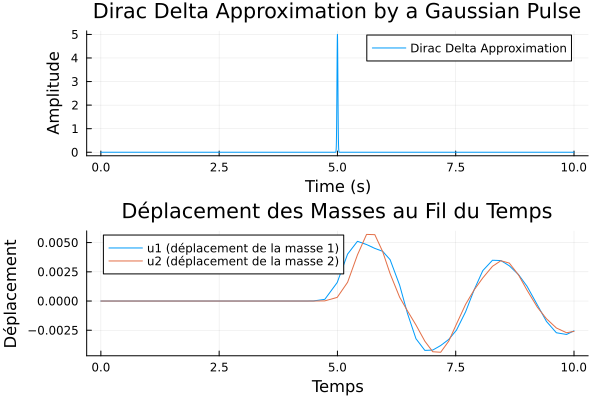

In [83]:
using DifferentialEquations
using Plots

# Définition des paramètres
m1 = 75.0  # masse 1 (entre 50 et 100 kg)
m2 = 85.0  # masse 2 (entre 50 et 100 kg)
ω01 = 2.0  # fréquence de résonance pour la masse 1
ω02 = 2.5  # fréquence de résonance pour la masse 2

k1 = m1 * ω01^2  # constante du ressort k1
k3 = m2 * ω02^2  # constante du ressort k3
k2 = 1500.0      # constante du ressort k2 (choisie pour créer un couplage entre les masses)

γ1 = 20.0  # coefficient d'amortissement γ1
γ2 = 25.0  # coefficient d'amortissement γ2
γ3 = 30.0  # coefficient d'amortissement γ3

# Définition de la force externe impulsive (Dirac) sur la masse 1 à t = 0.5
F0 = 5
t0 = 5.0                     # Time of impact
sigma = 0.18                  # Width of Gaussian pulse
epsilon = 0.01                # Width of the Dirac delta approximation

# Define the Gaussian pulse which approximates a Dirac delta function
function gaussian_pulse(t, t0, F0, sigma)
    return F0 * exp(-((t - t0)^2) / (2 * sigma^2))
end

# Fonction pour la force externe sur la masse 2 (aucune force externe ici)
F_external2(t) = 0.0

# Définition du système d'ODE du premier ordre
function system!(du, u, p, t)
    x1, v1, x2, v2 = u  # positions et vitesses
    
    du[1] = v1
    du[2] = (gaussian_pulse(t, t0, F0, sigma) - γ1*v1 - γ2*(v1 - v2) - k1*x1 - k2*(x1 - x2)) / m1
    du[3] = v2
    du[4] = (F_external2(t) - γ3*v2 - γ2*(v2 - v1) - k3*x2 - k2*(x2 - x1)) / m2
end

# Conditions initiales : positions et vitesses initiales nulles
u0 = [0.0, 0.0, 0.0, 0.0]

# Time interval for plotting the Dirac delta approximation
t = 0:0.001:10

# Calculate the Dirac delta approximation
dirac_approx = [gaussian_pulse(ti, t0, F0, epsilon) for ti in t]

# Intervalle de temps pour la simulation
tspan = (0.0, 10.0)

# Plot the Dirac delta approximation
p0 = plot(t, dirac_approx, label="Dirac Delta Approximation", xlabel="Time (s)", ylabel="Amplitude", title="Dirac Delta Approximation by a Gaussian Pulse")

# Définition du problème d'ODE du premier ordre
prob = ODEProblem(system!, u0, tspan)

# Résolution du problème avec la méthode Tsit5()
sol = solve(prob, Tsit5())

# Tracé des résultats des déplacements
p1 = plot(sol.t, sol[1,:], label="u1 (déplacement de la masse 1)", xlabel="Temps", ylabel="Déplacement", title="Déplacement des Masses au Fil du Temps")
plot!(sol.t, sol[3,:], label="u2 (déplacement de la masse 2)")

plot(p0, p1, layout = (2, 1))

2. **Compare Analytical and Numerical Solutions**:

   Compare the time-domain solutions $ u_1(t) $ and $ u_2(t) $ obtained analytically and numerically.

3. **Study stiffness**:

    definiton stifness donc on va étudider le systèem pour différentes valeurs de $\omega$ pour cela on va utiliser des masses yrès différentes 

4. **Frequency spectra**:

   Plot the frequency spectra of both masses over time to visualize the response of the system.

### 4.5 Vibration study 


Impose forced vibration with driving frequency \omega_d on one of two point masses. Proceed as before.  Investigate frequency response, in particular \omega_d close to one of both resonant frequencies. 



References: 

https://github.com/ziolai/ventura-modeling/blob/main/jupyter-notebooks/point-mass-systems.ipynb 

